# Construction PPE Object Detection: 
### <b><u>Train From Custom Dataset</b></u>
##### AAI-501 Group 4: Fatimat Atanda, Victor Hugo Germano, Darin Verduzco

# Dataset setup:
download contstruction_ppe+custom "datasets" folder (reduced large file names):
<br>https://uofsandiego-my.sharepoint.com/:f:/g/personal/dverduzco_sandiego_edu/ErQ7zeL1iABEmSsIX5Q1wv8BGT1SAY6Y3V5ICZcAHa_aww?e=XfGw9I
<br>into<u><b> "train_from_custom"</u></b> folder (will be ignored to git).
<br><br><u>Dataset Summary:</u>
<br>construction_ppe: 2801 images
<br>custom dataset: 58 images
<br> totals: (2859 raw_images and 2859 raw_labels)

### Import Modules and Libraries

In [35]:
import os 
import shutil
import time
import glob
import sys
import msaai
import cv2 # Opencv for images
import yaml
import torch
import random
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO # For obeject detection
import albumentations as A # For image augmentation
from albumentations.pytorch import ToTensorV2 # For image formating
from torchvision.transforms import ColorJitter
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

### Set path directories

In [36]:
dataset_base_dir = "datasets"
image_base_dir = dataset_base_dir + "/images"
labels_base_dir = dataset_base_dir + "/labels"

# Define directories to reset
image_dirs = {
    "train": f"{image_base_dir}/train",
    "valid": f"{image_base_dir}/valid",
    "test": f"{image_base_dir}/test",
}
label_dirs = {
    "train": f"{labels_base_dir}/train",
    "valid": f"{labels_base_dir}/valid",
    "test": f"{labels_base_dir}/test",
}

### Custom_data.yaml file creation in dataset dir

In [31]:
ppe_classes = [
    'Hardhat',
    'Mask',
    'NO-Hardhat',
    'NO-Mask',
    'NO-Safety Vest',
    'Person',
    'Safety Cone',
    'Safety Vest',
    'machinery',
    'vehicle'
]
number_classes = len(ppe_classes)
output_dir = 'datasets'

dict_file = {
    'train': 'images/train',
    'val': 'images/valid',
    'test': 'images/test',
    'nc': number_classes,
    'names': ppe_classes
}

with open(os.path.join(dataset_base_dir, 'custom_data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)
# Full yaml path to prevent path error
yaml_path = str(Path('datasets/custom_data.yaml').resolve())

### Clear train/test/valid image folders from "datasets" folder

In [23]:
directories_to_reset = list(image_dirs.values()) + list(label_dirs.values())

# Reset directories
msaai.reset_directories(directories_to_reset)

print("Directories reset and ready for use.")

Deleted existing directory: datasets/images/train
Recreated directory: datasets/images/train
Deleted existing directory: datasets/images/valid
Recreated directory: datasets/images/valid
Deleted existing directory: datasets/images/test
Recreated directory: datasets/images/test
Deleted existing directory: datasets/labels/train
Recreated directory: datasets/labels/train
Deleted existing directory: datasets/labels/valid
Recreated directory: datasets/labels/valid
Deleted existing directory: datasets/labels/test
Recreated directory: datasets/labels/test
Directories reset and ready for use.


### Split into train/valid/test folders from "raw_image" and "raw_label" folders

In [24]:
source_image_dir = dataset_base_dir + "/raw_images"
source_label_dir = dataset_base_dir + "/raw_labels"

# Combine and assign to DataFrame
img_split_df = msaai.img_train_test_split(source_image_dir)

# Copy files from source to folders 
msaai.arrange_image_and_label_files(
    img_split_df,
    source_image_dir,
    source_label_dir,
    image_dirs,
    label_dirs
)

### Show custom image dataset

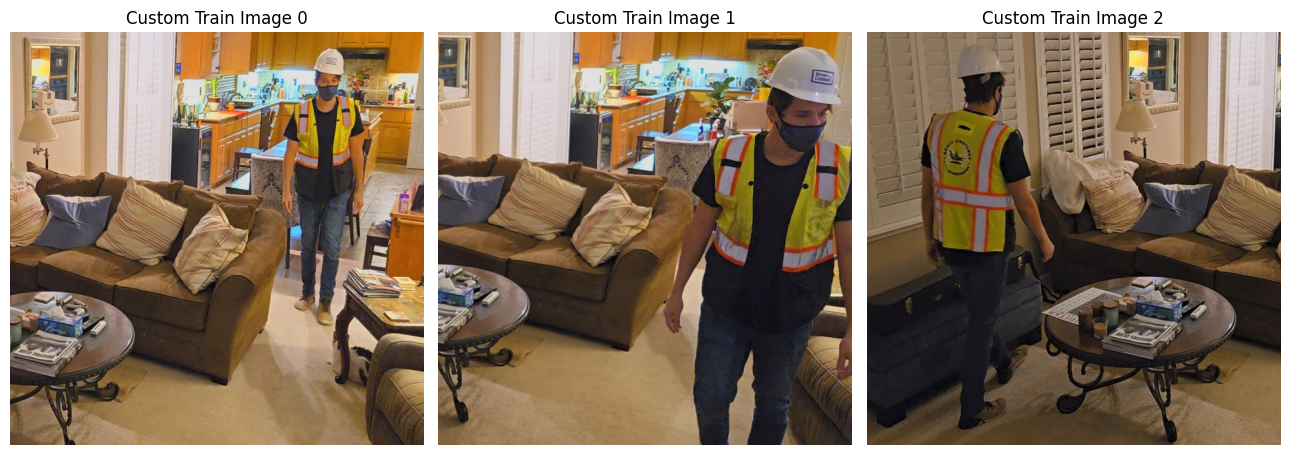

In [22]:
# Get the paths to the first three custom images
image_paths = glob.glob(f"{image_dirs["train"]}/scene*.jpg")[:3]

# Check if there are enough images
if len(image_paths) < 3:
    print("Not enough images found!")
else:
    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(13, 7))  # Width, height

    for i, ax in enumerate(axes):
        # Load and display each image
        image = mpimg.imread(image_paths[i])
        ax.imshow(image)
        ax.axis('off')  # Hide axes
        ax.set_title(f"Custom Train Image {i}")

    plt.tight_layout()
    plt.show()

### Show construction dataset

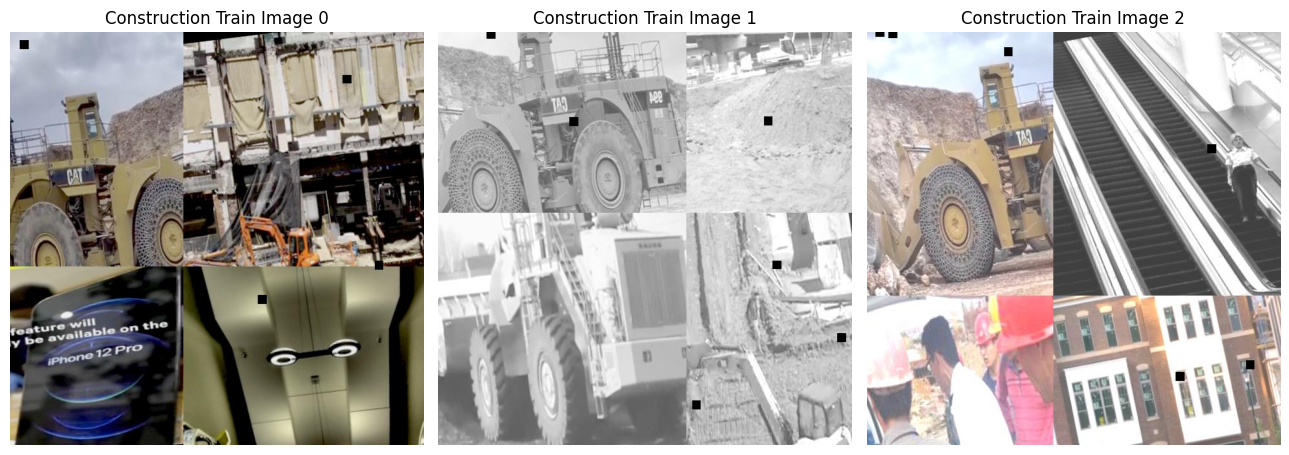

In [23]:
# Get the paths to the first three construction images
image_paths = glob.glob(f"{image_dirs["train"]}/construction*.jpg")[:3]

# Check if there are enough images
if len(image_paths) < 3:
    print("Not enough images found!")
else:
    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(13, 7))  # Adjust the figsize as needed

    for i, ax in enumerate(axes):
        # Load and display each image
        image = mpimg.imread(image_paths[i])
        ax.imshow(image)
        ax.axis('off')  # Hide axes
        ax.set_title(f"Construction Train Image {i}")

    plt.tight_layout()
    plt.show()

## <b><u>Train YOLOv8</b></u> from construction and custom dataset

In [32]:
proj_name = input('Please enter run folder description: ')
# Count in minutes
start = time.time()
for i in range(10000000):
    pass

# Train
model = YOLO('../../models/yolov8m.pt')
model.train(
    data = yaml_path,
    epochs = 30, # Dataset iterations
    patience = 10, # Epochs to wait to discontinue after no val metric improvement
    seed = 88, # Repeatability
    plots = True, # produce plots
    nms = True, # Non-Maximum Suppression (NMS) improves post-processing detection
    batch = 0.7, # Determine batch size using 80% of memory  for training
    name = proj_name # input for run description
)

# Time end
end = time.time()
elapsed_seconds = end - start
elapsed_minutes = elapsed_seconds / 60
print(f"Total model train time: {elapsed_minutes:.2f} minutes")

Please enter run folder description:  new m lower batch


Ultralytics 8.3.32  Python-3.12.4 torch-2.5.1+cpu CPU (Intel Core(TM) i9-14900KF)
engine\trainer: task=detect, mode=train, model=../../models/yolov8m.pt, data=C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\notebooks\train_from_custom\datasets\custom_data.yaml, epochs=30, time=None, patience=10, batch=0.7, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=new m lower batch, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=88, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\notebooks\train_from_custom\datasets\la


train: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\notebooks\train_from_custom\datasets\images\train\004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\notebooks\train_from_custom\datasets\images\train\construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed
train: New cache created: C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\notebooks\train_from_custom\datasets\labels\train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 70.0% CUDA memory utilization.
AutoBatch:   intended for CUDA devices, using default batch-size 16


train: Scanning C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\notebooks\train_from_custom\datasets\la

train: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\notebooks\train_from_custom\datasets\images\train\004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\notebooks\train_from_custom\datasets\images\train\construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\notebooks\train_from_custom\datasets\labe

val: New cache created: C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\notebooks\train_from_custom\datasets\labels\valid.cache


Plotting labels to runs\detect\new m lower batch\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\new m lower batch
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.299      1.966      1.479        262        640: 100%|██████████| 125/125 [16:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:46

                   all        569       7670      0.538      0.452      0.448       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.239      1.515      1.428        275        640: 100%|██████████| 125/125 [16:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:51

                   all        569       7670      0.592      0.416      0.436      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.253      1.483      1.422        231        640: 100%|██████████| 125/125 [16:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:51

                   all        569       7670      0.625      0.446      0.487       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.242      1.444      1.415        326        640: 100%|██████████| 125/125 [15:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:48

                   all        569       7670      0.656      0.496      0.537      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.202      1.346      1.382        331        640: 100%|██████████| 125/125 [15:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:44

                   all        569       7670      0.673      0.501      0.539      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.173      1.287      1.366        275        640: 100%|██████████| 125/125 [15:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:45

                   all        569       7670      0.736      0.522      0.592      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G       1.15      1.233      1.349        255        640: 100%|██████████| 125/125 [15:12<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:46

                   all        569       7670      0.761      0.566      0.636      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.106      1.158      1.327        325        640: 100%|██████████| 125/125 [15:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:49

                   all        569       7670      0.773      0.571       0.65      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.089      1.097      1.304        244        640: 100%|██████████| 125/125 [16:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:56

                   all        569       7670      0.782      0.594      0.668      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.067      1.056      1.283        424        640: 100%|██████████| 125/125 [17:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:50

                   all        569       7670      0.805      0.591      0.679      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.037      1.023      1.267        274        640: 100%|██████████| 125/125 [16:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:49

                   all        569       7670      0.818      0.622      0.705      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.022     0.9724      1.257        376        640: 100%|██████████| 125/125 [16:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:51

                   all        569       7670      0.828       0.63      0.712      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.9995     0.9381      1.239        556        640: 100%|██████████| 125/125 [16:14<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:52

                   all        569       7670      0.827       0.64      0.723      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.9771      0.899      1.225        276        640: 100%|██████████| 125/125 [16:13<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:51

                   all        569       7670      0.828      0.652       0.73      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.9546     0.8733      1.216        308        640: 100%|██████████| 125/125 [16:33<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:54

                   all        569       7670       0.85      0.666      0.744      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.9424     0.8487      1.203        308        640: 100%|██████████| 125/125 [16:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:51

                   all        569       7670      0.855       0.66      0.745      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.9331     0.8252      1.195        292        640: 100%|██████████| 125/125 [16:32<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:50

                   all        569       7670      0.869      0.665      0.755      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.9093     0.7923      1.184        275        640: 100%|██████████| 125/125 [16:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:50

                   all        569       7670       0.85      0.684      0.764        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.9053     0.7639       1.17        257        640: 100%|██████████| 125/125 [16:32<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:54

                   all        569       7670      0.866      0.691      0.772      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.8683     0.7246      1.155        349        640: 100%|██████████| 125/125 [15:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:47

                   all        569       7670      0.877      0.698      0.783      0.523


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.8941     0.6708      1.167        195        640: 100%|██████████| 125/125 [14:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:45

                   all        569       7670      0.864      0.706      0.783      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      0.869     0.6296      1.152        221        640: 100%|██████████| 125/125 [14:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:46

                   all        569       7670      0.875      0.718      0.796      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.8431     0.5999      1.133        173        640: 100%|██████████| 125/125 [14:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:45

                   all        569       7670      0.883       0.72      0.796      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      0.813     0.5655      1.108        225        640: 100%|██████████| 125/125 [14:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:44

                   all        569       7670      0.879       0.73      0.806      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.7991     0.5535      1.107        213        640: 100%|██████████| 125/125 [14:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:43

                   all        569       7670      0.893      0.735      0.812      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.7768     0.5278       1.09        162        640: 100%|██████████| 125/125 [14:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:44

                   all        569       7670      0.891      0.737      0.815      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.7561     0.5144      1.078        208        640: 100%|██████████| 125/125 [14:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:45

                   all        569       7670      0.892       0.74      0.817      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.7305     0.4915      1.058        184        640: 100%|██████████| 125/125 [14:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:45

                   all        569       7670      0.897       0.75      0.819      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.7129     0.4776      1.052        225        640: 100%|██████████| 125/125 [14:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:43

                   all        569       7670        0.9      0.748      0.823      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.6986     0.4668      1.047        114        640: 100%|██████████| 125/125 [14:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:43

                   all        569       7670      0.904      0.752      0.824      0.581



30 epochs completed in 8.776 hours.
Optimizer stripped from runs\detect\new m lower batch\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\new m lower batch\weights\best.pt, 52.0MB

Validating runs\detect\new m lower batch\weights\best.pt...
Ultralytics 8.3.32  Python-3.12.4 torch-2.5.1+cpu CPU (Intel Core(TM) i9-14900KF)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:29


                   all        569       7670      0.904      0.752      0.824      0.581
               Hardhat        271        711      0.918      0.724      0.807      0.529
                  Mask        225        306      0.933      0.911       0.94      0.743
            NO-Hardhat        283        454       0.93      0.702      0.806      0.529
               NO-Mask        320        652      0.875      0.657      0.722      0.399
        NO-Safety Vest        399        835      0.908      0.762      0.834      0.588
                Person        542       2005      0.923      0.812      0.892      0.681
           Safety Cone        125        618      0.835      0.563      0.656      0.349
           Safety Vest        273        652      0.918      0.759      0.834      0.601
             machinery        440       1114       0.94        0.9      0.945      0.805
               vehicle        166        323      0.862      0.733      0.802      0.591
Speed: 0.9ms preproce

# Model Performance Metrics

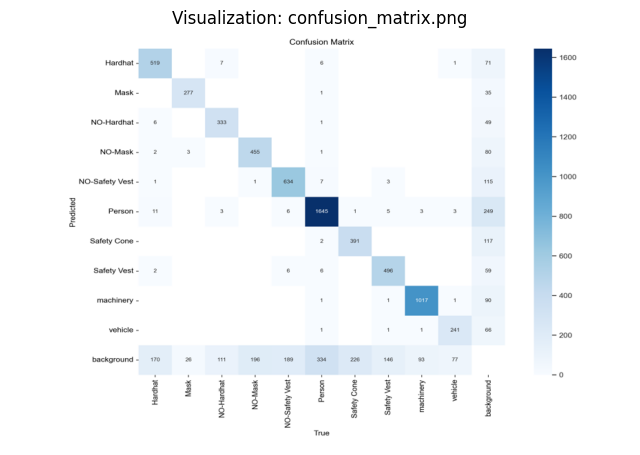

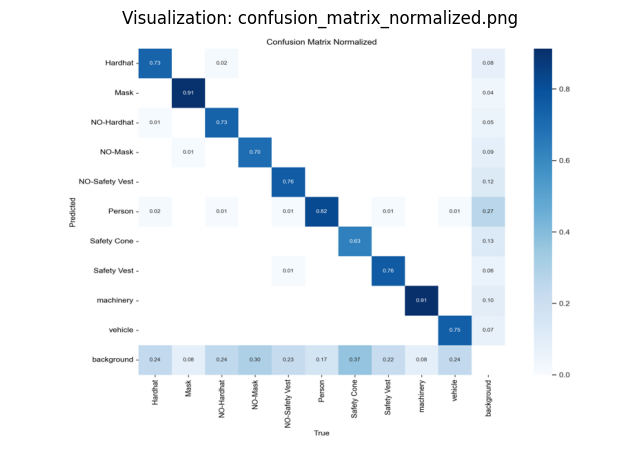

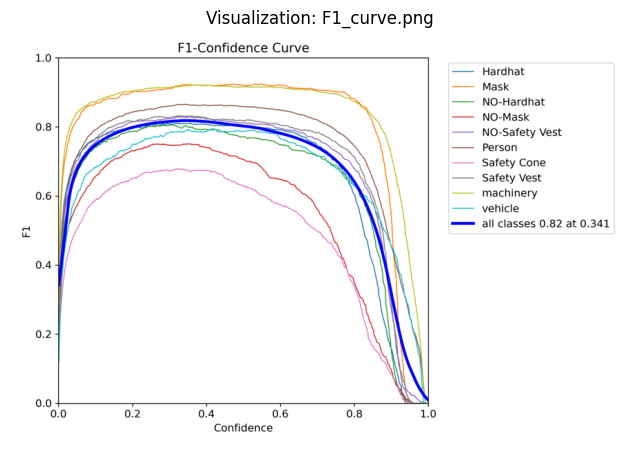

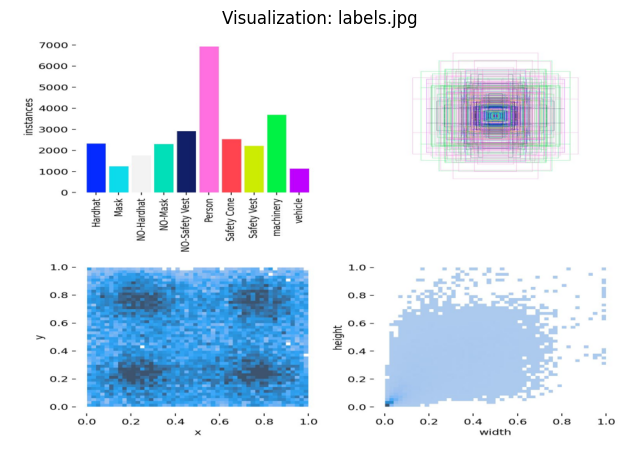

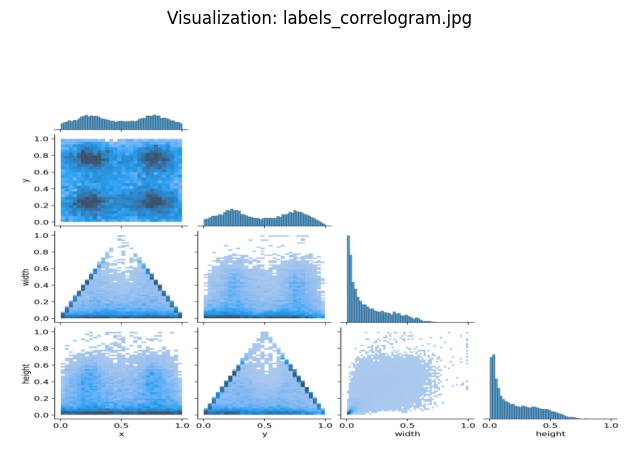

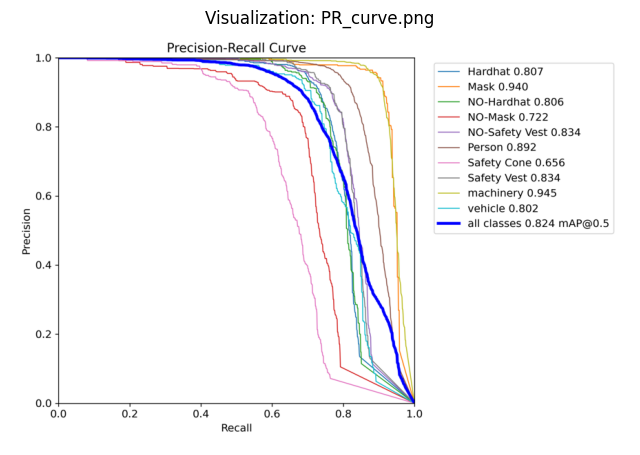

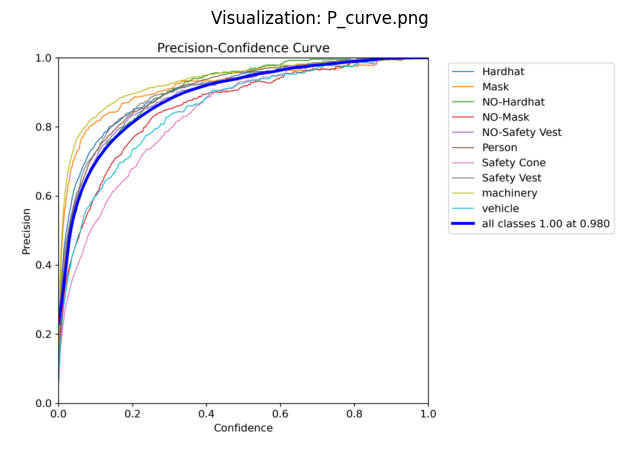

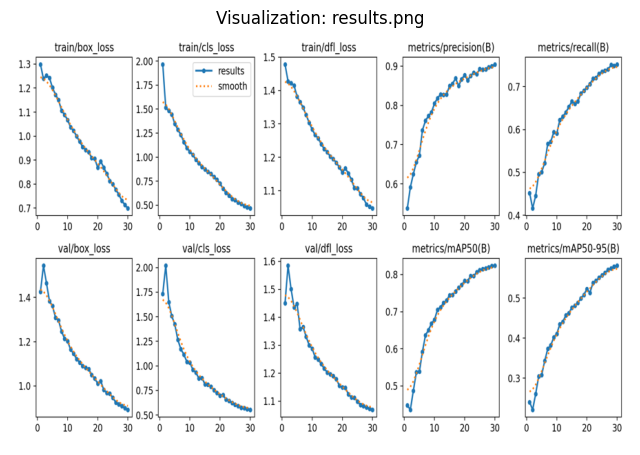

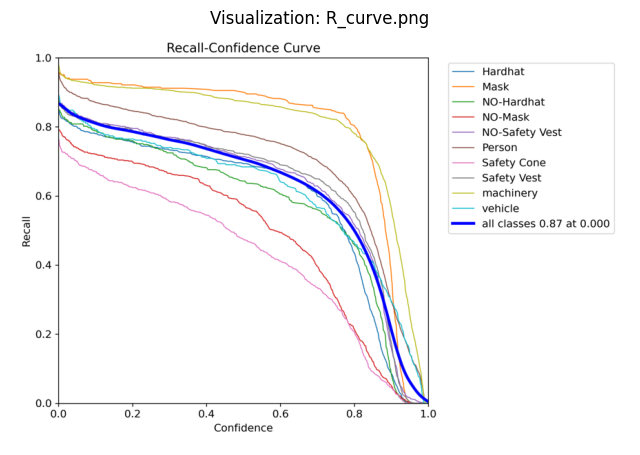

In [7]:
run_path = "runs/detect/train"
# Loop through images, do not include images for val and train
img_files = [
    f for f in os.listdir(run_path) 
    if f.endswith((".png", ".jpg")) and not f.startswith(("train", "val"))
]

# Loop through each image file and display it
for img_file in img_files:
    file_path = os.path.join(run_path, img_file)
    image = Image.open(file_path).resize((900, 600)) # width, height
    # Display the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")  # Hide axes
    plt.title(f"Visualization: {img_file}")
    plt.show()

### Show validation image labels vs predictions

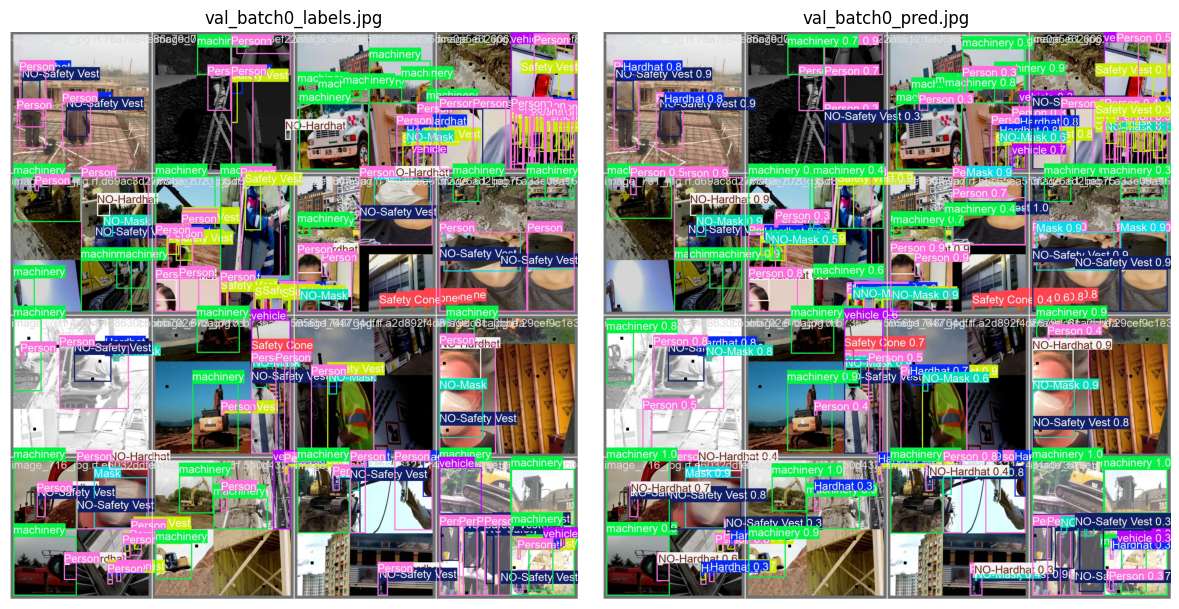

In [28]:
# Get val label and pred image
pred_image_path = glob.glob(os.path.join(run_path, "val_batch0*pred.jpg"))
labels_image_path = glob.glob(os.path.join(run_path, "val_batch0*labels.jpg"))

# Assign first matching image if found
pred_image_path = pred_image_path[0] if pred_image_path else None
labels_image_path = labels_image_path[0] if labels_image_path else None

# Error if not found
if not pred_image_path or not labels_image_path:
    print("Not enough images found!")
else:
    # Plot the images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
    for ax, image_path in zip(axes, [labels_image_path, pred_image_path]):
        image = mpimg.imread(image_path)
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(os.path.basename(image_path))  # Title is the image name

    plt.tight_layout()
    plt.show()

### Construction and Custom test images

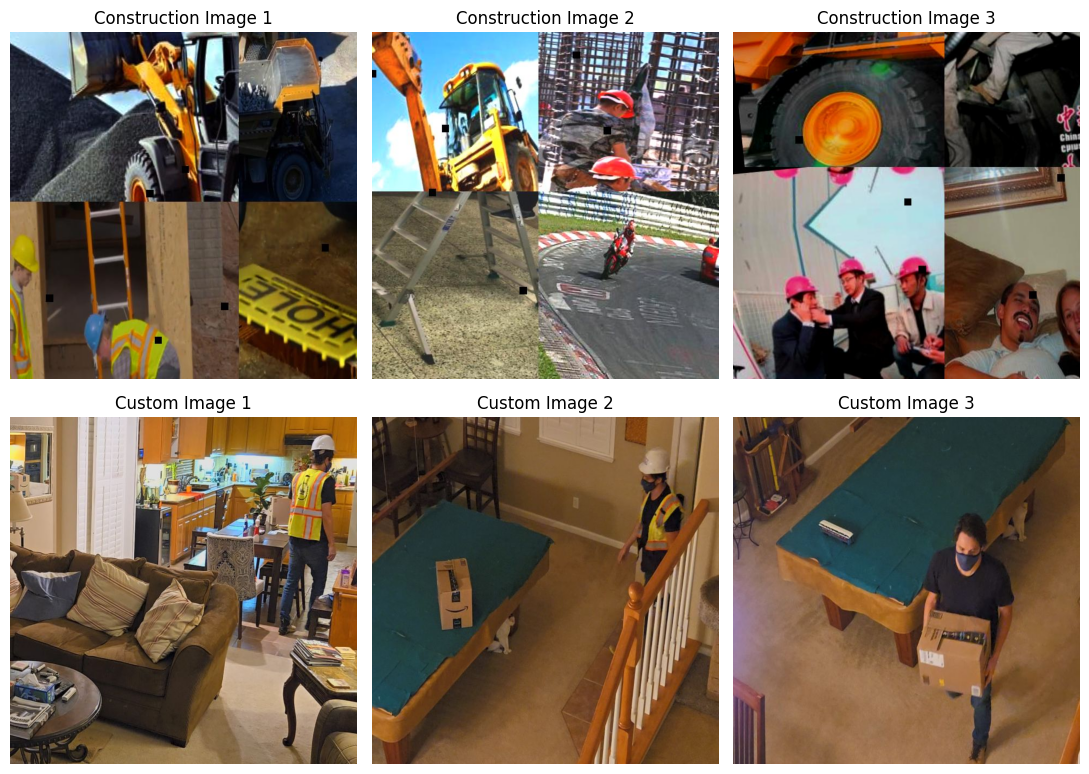

In [29]:
# Get the paths to the first three "construction" and "scene" test images
construction_images = glob.glob(f"{image_dirs['test']}/construction*.jpg")[:3]
scene_images = glob.glob(f"{image_dirs['test']}/scene*.jpg")[:3]

# Combine the image paths
image_paths = construction_images + scene_images

# Check if there are enough images
if len(image_paths) < 6:
    print("Not enough images found!")
else:
    # Create a subplot with 2 rows and 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(11, 8))  # height, width

    for i, ax in enumerate(axes.flatten()):
        # Load and display each image
        image = mpimg.imread(image_paths[i])
        ax.imshow(image)
        ax.axis('off')  # Hide axes
        if i < 3:
            ax.set_title(f"Construction Image {i + 1}")  # Titles for construction images
        else:
            ax.set_title(f"Custom Image {i - 2}")  # Titles for scene images

    plt.tight_layout()
    plt.show()

### Predict test images with fine tuned model (best.pt)

Results saved to runs\detect\predict
Results saved to runs\detect\predict


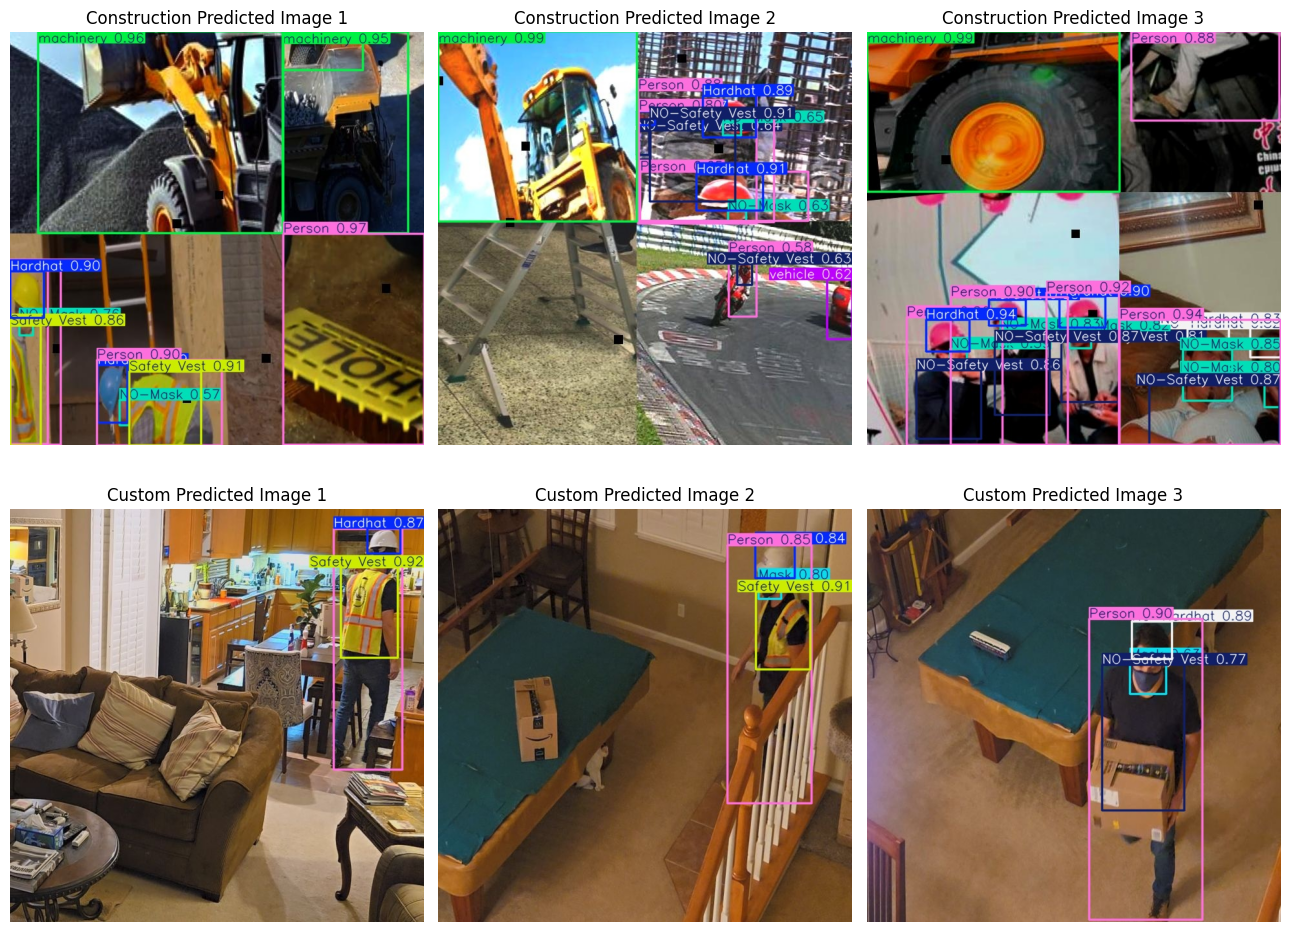

In [20]:
# Remove previous predictions
detect_path = "runs/detect/"
for folder in os.listdir(detect_path):
    folder_path = os.path.join(detect_path, folder)
    if os.path.isdir(folder_path) and folder.startswith("predict"):
        shutil.rmtree(folder_path, ignore_errors=True)

# Load fine tuned model
model = YOLO("runs/detect/train/weights/best.pt")

# Make predictions on "scene" and "construction" images
for prefix in ["scene", "construction"]:
    model.predict(
        f"{image_dirs['test']}/{prefix}*.jpg",
        save=True,        # Enable saving predictions
        conf=0.45,        # Minimum confidence threshold
        agnostic_nms=True,  # Merge overlapping boxes across classes
        iou=0.8,          # Intersection over Union threshold
        verbose=False     # Silence prediction output
    )

# Get the paths to the first three "scene" and "construction" predicted images
scene_predicted_paths = glob.glob("runs/detect/predict/scene*.jpg")[:3]
construction_predicted_paths = glob.glob("runs/detect/predict/construction*.jpg")[:3]

# Combine the image paths, construction on top row
all_predicted_paths =  construction_predicted_paths + scene_predicted_paths

# Check if there are enough predicted images
if len(all_predicted_paths) < 6:
    print("Not enough predictions found!")
else:
    # Create a subplot with 2 rows and 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(13, 10)) # Width, height

    for i, ax in enumerate(axes.flatten()):
        # Load and display each predicted image
        image = mpimg.imread(all_predicted_paths[i])
        ax.imshow(image)
        ax.axis('off')  # Hide axes
        # Set titles based on the type of image
        if i < 3:
            ax.set_title(f"Construction Predicted Image {i + 1}")
        else:
            ax.set_title(f"Custom Predicted Image {i - 2}")

    plt.tight_layout()
    plt.show()